## Decision Trees

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 



df = pd.read_csv("Datasets/heart.csv")

X = df[['age', 'thalach']]
y = df['target']


In [46]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


#standardize/scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Next we'll instantiate an instance of the ```sklearn.tree.DecisionTreeClassifier``` model.
Then, we train the model by calling the ```fit()``` method. 


In [47]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

After training our data, let's visualize the tree structure of our current model.

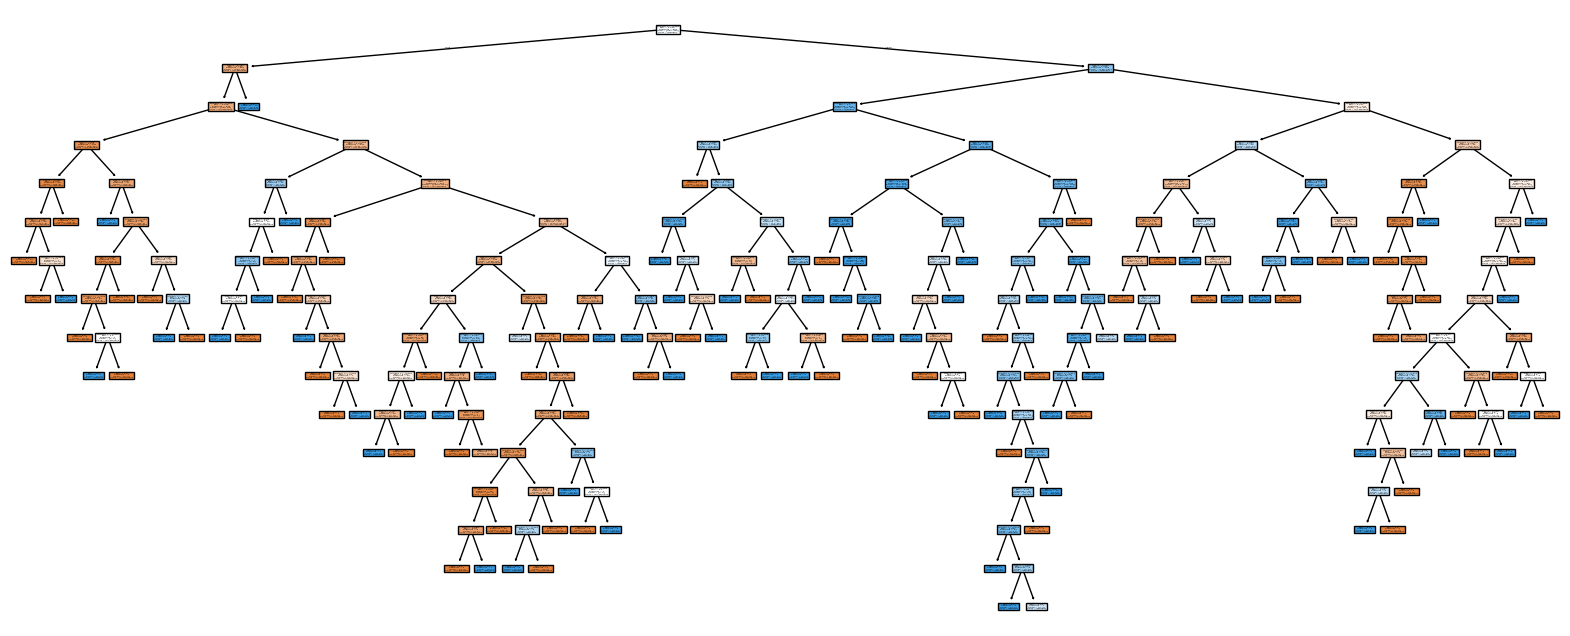

In [48]:
from sklearn.tree import plot_tree
from sklearn import tree as sktree

plt.figure(figsize=(20,8))
sktree.plot_tree(decision_tree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

Let's make another tree plot but now with max depth of 4:

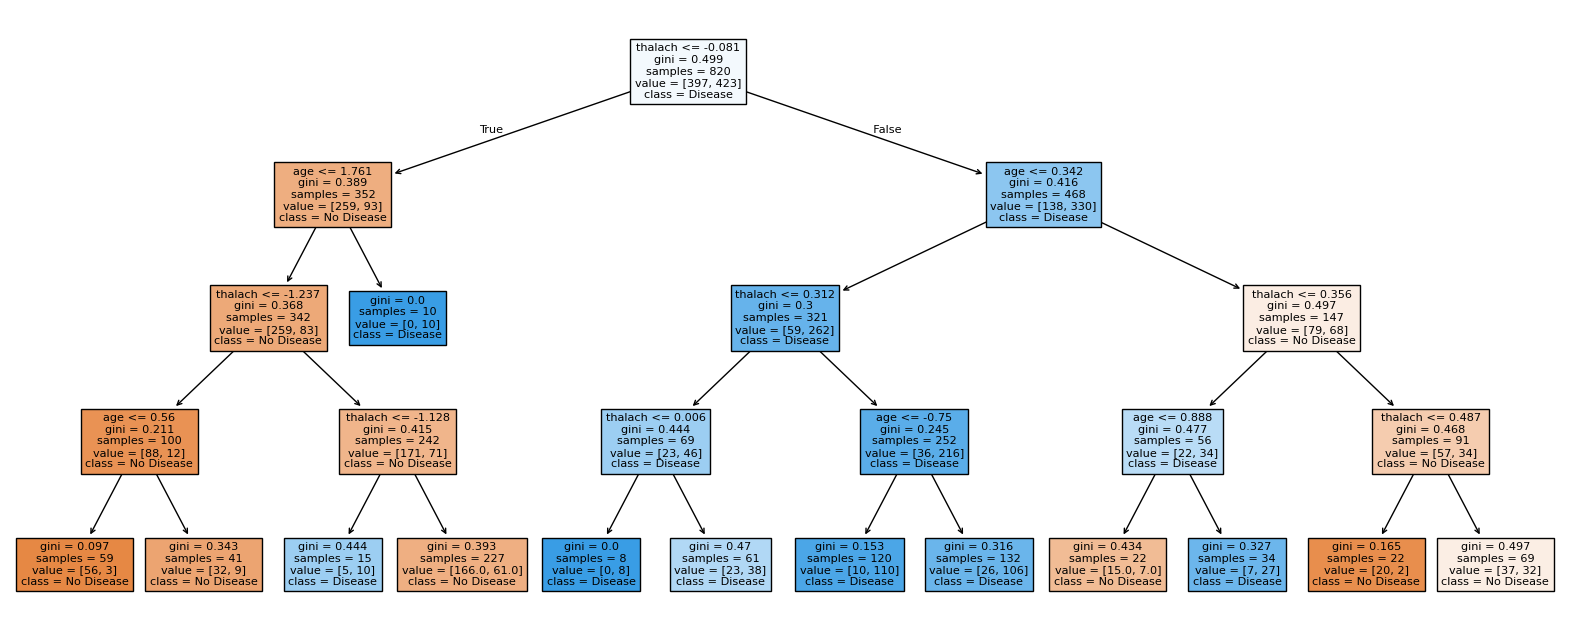

In [ ]:
decision_tree2 = DecisionTreeClassifier(max_depth=4,random_state=42)
decision_tree2.fit(X_train, y_train)
plt.figure(figsize=(20,8))
sktree.plot_tree(decision_tree2, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

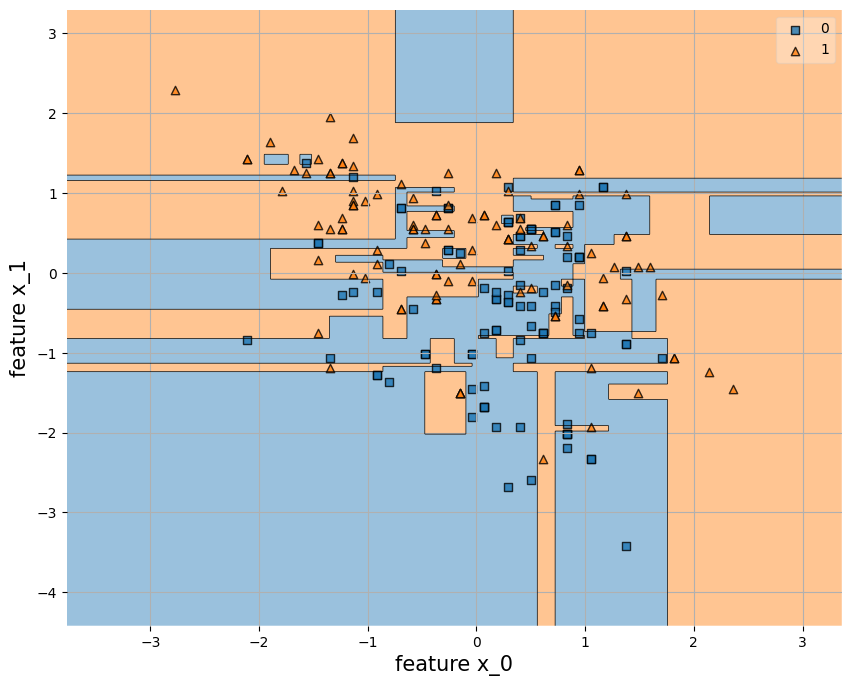

In [ ]:
from mlxtend.plotting import plot_decision_regions


plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = decision_tree)
plt.xlabel("age", fontsize = 15)
plt.ylabel("thalach", fontsize = 15)
plt.grid()
plt.show()

We can also try to plot the decision regions for our less deep tree with max depth of 4, and see how the plot changes.

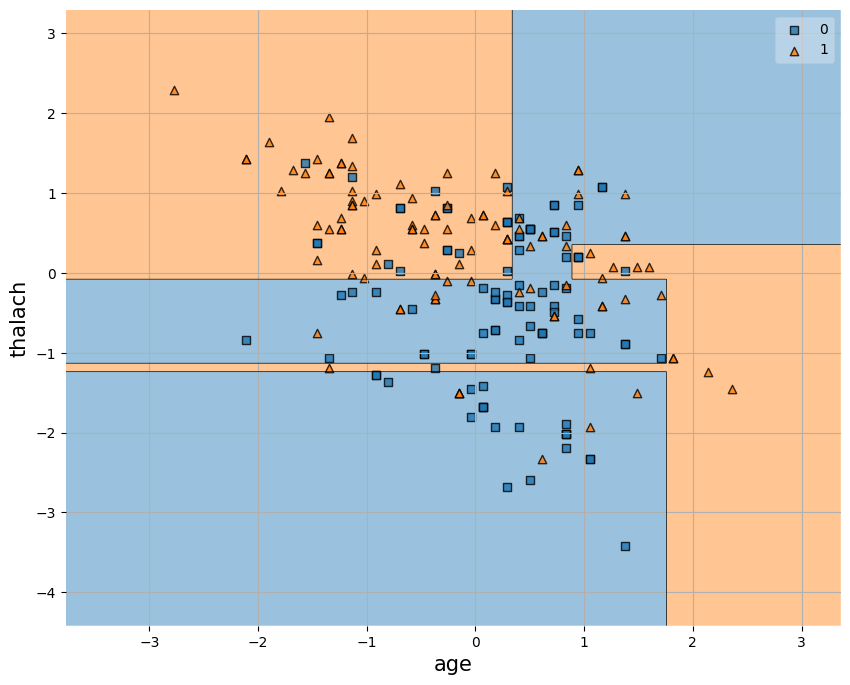

In [56]:

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = decision_tree2)
plt.xlabel("age", fontsize = 15)
plt.ylabel("thalach", fontsize = 15)
plt.grid()
plt.show()


The background colors (blue and orange) show the regions where the decision tree predicts each class.

Decision trees split the feature space with horizontal and vertical lines (because each split is on a single feature at a time).
My plot shows these classic "rectangular" regions. The model creates axis-aligned boundaries that partition the feature space into regions for each class, with some misclassifications where the classes overlap.
Reducing the tree depth makes the boundaries smoother but may reduce accuracy. 


---
Next, let's evaluate our model's performance on test data.

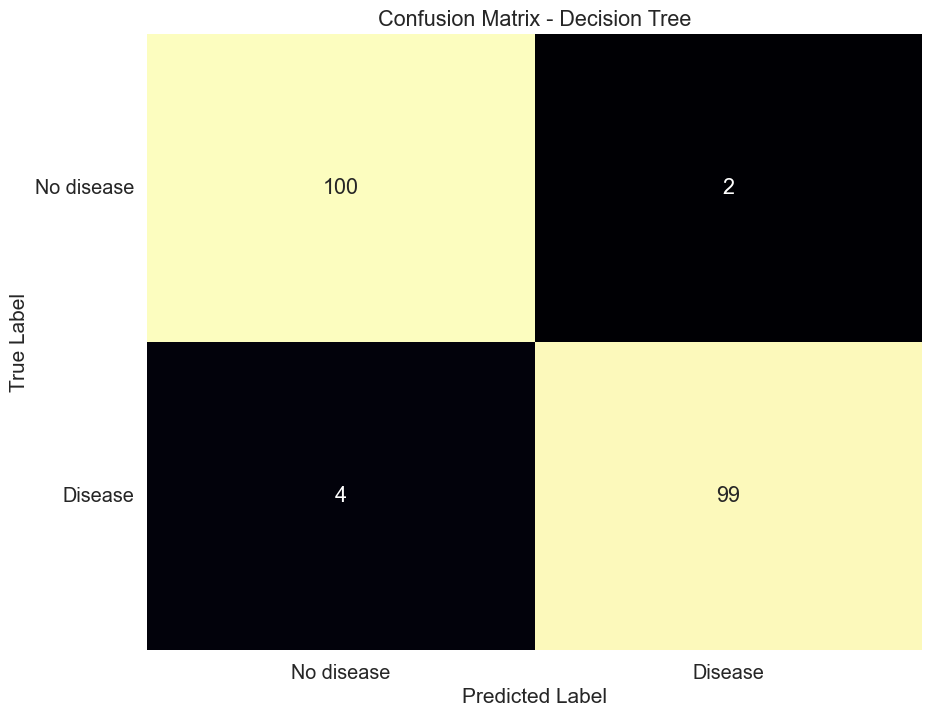

In [61]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics


import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["No disease", "Disease"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["No disease", "Disease"], rotation=0)
plt.show()

Here is the breakdown of my confusion matrix:

True Negatives (TN): 100 (correctly predicted No Disease)

False Positives (FP): 2 (predicted Disease, actually No Disease)

False Negatives (FN): 4 (predicted No Disease, actually Disease)

True Positives (TP): 99 (correctly predicted Disease)

In [59]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       102
           1       0.98      0.96      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



The classification report demonstrates that the decision tree classifier achieves excellent performance on the test set, with an overall accuracy of 97%. Both classes are predicted with high precision and recall (≥96%), and the F1-scores indicate a strong balance between these metrics. The model shows no significant bias toward either class and is highly effective for this binary classification task.

For comparison I wanted to see how my second/more simplified tree would perform:

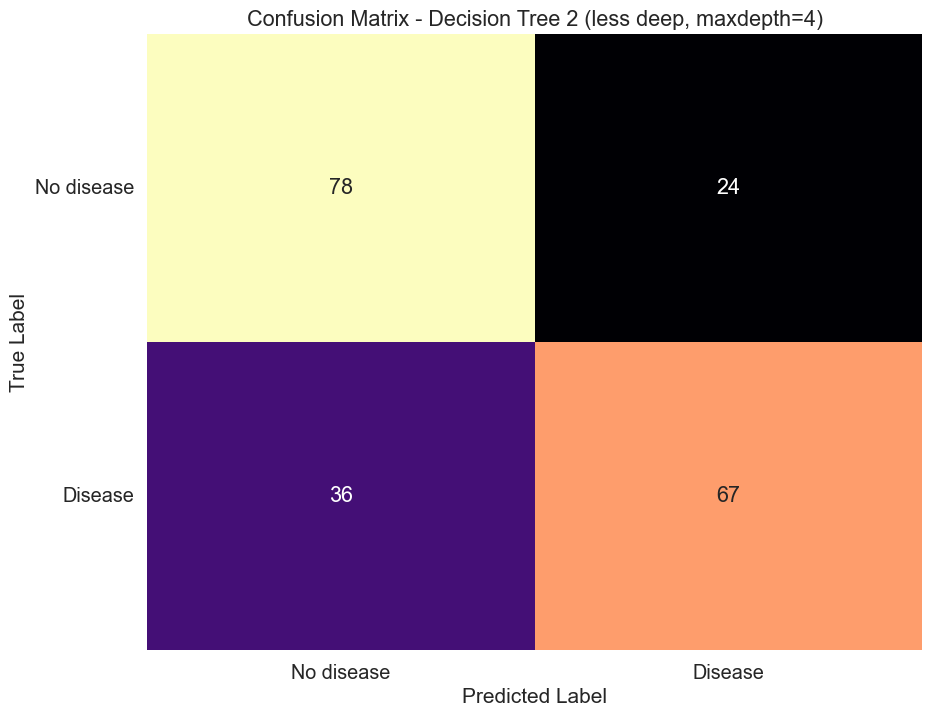

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       102
           1       0.74      0.65      0.69       103

    accuracy                           0.71       205
   macro avg       0.71      0.71      0.71       205
weighted avg       0.71      0.71      0.71       205



In [64]:

test_pred_decision_tree2 = decision_tree2.predict(X_test)

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree2)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree 2 (less deep, maxdepth=4)")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["No disease", "Disease"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["No disease", "Disease"], rotation=0)
plt.show()
y_pred = decision_tree2.predict(X_test)

print(classification_report(y_test, y_pred))

The performance is very different!

There is 24 false positives and 36 false negatives. 
Reducing max_depth to 4 made my tree much simpler, but also much less accurate.
Reducing the decision tree’s depth to 4 resulted in a significant drop in performance, with accuracy falling to 71% and an increase in both false positives and false negatives. This underfitting indicates that the tree is too simple to model the underlying patterns in the data.